# **ECS7020P mini-project submission Advanced Component**

**Advanced component:** Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

# **1. Author**

**Student Name**:  Aashika Elavarasan

**Student ID**:  230356836

# **2. Problem Formulation**

#### **Background and Objective**

In this project, I am addressing a compelling problem in the realm of **culinary data analysis**:

predicting the healthiness rating of various dishes based on a range of features. This involves examining attributes such as cuisine type, ingredients, preparation settings (home or restaurant), and other factors that might influence a dish's perceived healthiness. The objective is to develop a machine learning model capable of accurately estimating the healthiness rating of a dish from these features.

**Significance:** With growing interest in healthy eating, the ability to objectively assess the healthiness of food is increasingly valuable. This model can support better dietary choices and provide insights for health professionals and culinary experts.

**Machine Learning Approach:** The project leverages machine learning to interpret complex, subjective data and predict healthiness ratings. It involves challenges like processing diverse data types and understanding nuanced dietary health perceptions.

**Challenges and Innovation:** The subjective nature of healthiness and the integration of varied data types (categorical, textual) present unique challenges. The project explores the efficacy of different machine learning models, and offering insights into dietary health analysis.

**Conclusion:** This machine learning project intersects data science, nutrition, and culinary arts, aiming to enhance our understanding of health in the culinary domain through advanced techniques.

# **3. Pipeline Stages**

Each stage of the pipeline plays a crucial role in ensuring the accuracy and reliability of the predictions.

1. **Data Input**
   - The initial dataset, comprising various attributes related to dishes, including cuisine type, ingredients, preparation settings, and more.
   - Raw data in CSV format.

2. **Data Preprocessing**
   - **Sub-Stages**:
     - *Handling Missing Values*: Missing data in target and other columns are addressed, and handled.
     - *Feature Encoding*: Categorical variables like cuisine type are one-hot encoded. Textual data, such as ingredients, are processed using vectorization techniques.
   - A structured dataset where all variables are numeric and suitable for ML models.

3. **Feature Scaling**
   - Numeric features are scaled to ensure consistent data ranges, typically using standardization.
   - A numeric dataset with features having a mean of 0 and standard deviation of 1.

4. **Data Splitting**
   - The dataset is split into training and testing subsets to enable model evaluation.
   - Two sets of data - one for training the model and the other for testing its performance.

5. **Model Training**
   - Selection and training of a regression model on the training dataset.
   - A trained ML model ready to make predictions.

6. **Model Evaluation**
   - The model's performance is evaluated on the test dataset using metrics such as Mean Squared Error (MSE) and R-squared.
   - Performance metrics that quantify the model's predictive accuracy.

In [1]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import mlend
from mlend import download_yummy, yummy_load

subset = {}

datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [4]:
os.listdir(datadir)

['MLEndYD_images_small',
 'MLEndYD_images',
 'MLEndYD_image_attributes_small.csv',
 'MLEndYD_image_attributes_benchmark.csv']

In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [16]:
# Calculate correlation coefficients to chooose features
correlation_matrix = MLENDYD_df.corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix['Healthiness_rating_int'].sort_values(ascending=False)
print(target_correlations)


Healthiness_rating_int    1.000000
Likeness_int              0.148684
Name: Healthiness_rating_int, dtype: float64


<ipython-input-16-17dbacef3029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Checking for Missing Values
Ensure there are no missing values in target column.

In [10]:
# Check for missing values
missing_values = MLENDYD_df['Healthiness_rating_int'].isnull().sum()
print(f"Missing values in Healthiness_rating_int: {missing_values}")



Missing values in Healthiness_rating_int: 1


In [11]:

# Handling missing value
median_healthiness = MLENDYD_df['Healthiness_rating_int'].median()
MLENDYD_df['Healthiness_rating_int'].fillna(median_healthiness, inplace=True)

# Check if there are any missing values left
missing_values_after = MLENDYD_df['Healthiness_rating_int'].isnull().sum()
print(f"Missing values : {missing_values_after}")

Missing values : 0


In [12]:
# Check unique values in 'Healthiness_rating' column
print("Unique values in 'Healthiness_rating':", MLENDYD_df['Healthiness_rating'].unique())

# Check unique values in 'Healthiness_rating_int' column
print("Unique values in 'Healthiness_rating_int':", MLENDYD_df['Healthiness_rating_int'].unique())

# Check unique values in 'Likeness_int' column
print("Unique values in 'Likeness_int':", MLENDYD_df['Likeness_int'].unique())
print("Unique values in 'Likeness':", MLENDYD_df['Likeness'].unique())
print("Unique values in 'Home_or_restaurant':", MLENDYD_df['Home_or_restaurant'].unique())

Unique values in 'Healthiness_rating': ['neutral' 'unhealthy' 'healthy' 'very_healthy' 'very_unhealthy' nan]
Unique values in 'Healthiness_rating_int': [3. 2. 4. 5. 1.]
Unique values in 'Likeness_int': [ 4.  5.  2.  3.  1. nan]
Unique values in 'Likeness': ['like' 'strongly_like' 'dislike' 'neutral' 'strongly_dislike' nan]
Unique values in 'Home_or_restaurant': ['marugame_udon' 'home' 'jinli_flagship_branch' 'restaurant'
 'khyber_grill' 'pilpel' 'tesco' "rosa's" 'yun_gui_chuan' 'restraurant'
 'broasto' 'dandan_noodle_restaurant' 'subway' "emilia's_crafted_pasta"
 'hiba_restraunt' 'senatus' 'papa_johns' 'wngz' 'ymca_indian_restaurant'
 "mcdonald's" 'mexican_dining_otra' 'the_curve' 'wasabi' 'wazzir'
 'the_curve_mile_end' 'saravana_bhavan' 'sainsbury'
 "harper's_steakhouse_weighbridge" 'chinese_supermarket' 'coco_di_mama'
 'gdk' 'burger_and_chop' 'fried_&_grilled' 'curve' 'afghan_grill'
 'old_building-lse' 'resturant' 'erhan' 'mcdonalds'
 'kentucky_fried_chicken' 'aldi' 'tcr_bar' "sainsb

In [13]:
# Replace specific restaurant names with 'restaurant'
MLENDYD_df['Home_or_restaurant'] = MLENDYD_df['Home_or_restaurant'].replace(to_replace=r'^(?!home$).*$', value='restaurant', regex=True)

# Check the updated unique values
print("Updated unique values in 'Home_or_restaurant':", MLENDYD_df['Home_or_restaurant'].unique())


Updated unique values in 'Home_or_restaurant': ['restaurant' 'home']


In [14]:
# Drop rows where 'Healthiness_rating', 'Healthiness_rating_int', or 'Likeness_int' contain NaN
MLENDYD_df = MLENDYD_df.dropna(subset=['Healthiness_rating', 'Healthiness_rating_int', 'Likeness_int','Likeness'])

# Check to ensure the NaN values have been removed
print("Unique values in 'Healthiness_rating' after removal:", MLENDYD_df['Healthiness_rating'].unique())
print("Unique values in 'Healthiness_rating_int' after removal:", MLENDYD_df['Healthiness_rating_int'].unique())
print("Unique values in 'Likeness_int' after removal:", MLENDYD_df['Likeness_int'].unique())
# Check unique values in 'Likeness' column
print("Unique values in 'Likeness':", MLENDYD_df['Likeness'].unique())


Unique values in 'Healthiness_rating' after removal: ['neutral' 'unhealthy' 'healthy' 'very_healthy' 'very_unhealthy']
Unique values in 'Healthiness_rating_int' after removal: [3. 2. 4. 5. 1.]
Unique values in 'Likeness_int' after removal: [4. 5. 2. 3. 1.]
Unique values in 'Likeness': ['like' 'strongly_like' 'dislike' 'neutral' 'strongly_dislike']


In [15]:
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,restaurant,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,restaurant,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


The first two photos in dataset:




In [18]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

(-0.5, 4031.5, 3023.5, -0.5)

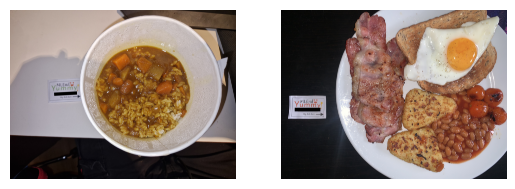

In [19]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

### **4. Transformation Stage**

#### Overview

The transformation stage in machine learning pipeline plays a pivotal role in preparing the raw dataset for effective modeling. This stage involves various data transformations, including handling missing values, feature extraction and encoding. These processes ensure that the dataset is clean, consistent, and suitable for feeding into machine learning algorithms.

#### Input

- **Input Data**: The raw dataset contains various attributes related to dishes, such as 'Healthiness_rating', 'Healthiness_rating_int', 'Likeness', 'Likeness_int', and 'Home_or_restaurant'.
- **Format**: The dataset includes a mix of categorical and numerical data, with some missing values.

#### Transformations

1. **Handling Missing Values**:
   - **Process**:
     - Identified and filled missing values in the 'Healthiness_rating_int'.
     - Dropped rows with NaN values in critical columns like 'Healthiness_rating', 'Healthiness_rating_int', and 'Likeness_int'.
   - **Rationale**: This step ensures that the model does not encounter missing data, which could lead to biased or inaccurate predictions.


### Feature extraction

#### Overview

The transformation stage is designed to convert raw data into a feature set that a machine learning model can use. This stage involves feature extraction and encoding, particularly focusing on the 'Ingredients' column, which requires specialized preprocessing to convert from text to a numerical format.

#### Ingredients Analysis and Transformation

- **Input**: Raw textual data from the 'Ingredients' column.
- **Process**:
  - *Tokenization*: Ingredients were tokenized by splitting on commas and stripping whitespace.
  - *Cleaning*: Textual data was cleaned to remove non-ingredient words, measurements, and quantities, ensuring only ingredient names were retained.
  - *Vectorization*: The MultiLabelBinarizer was used to convert the list of ingredients for each dish into a binary matrix, indicating the presence or absence of each ingredient.
  - *Visualization*: A bar chart was created to visualize the top ingredients by frequency, providing insights into the most common ingredients.
- **Output**: A binary matrix where each column represents an ingredient and each row corresponds to a dish, with '1' indicating the presence of an ingredient and '0' its absence.

#### Categorical Data Encoding

- **Input**: Categorical data from 'Cuisine', 'Home_or_restaurant', and 'Diet' columns.
- **Process**:
  - *One-hot Encoding*: The `get_dummies` method from pandas was applied to convert categorical variables into a binary matrix.
- **Output**: Binary encoded features for each categorical variable, ready to be used alongside the ingredient features.

#### Feature Set Construction

- **Input**: The binary matrices from the ingredient vectorization and categorical variable encoding.
- **Process**:
  - *Combination*: The binary matrices from ingredients and one-hot encoded categorical variables were concatenated to create a comprehensive feature set.
- **Output**: A combined feature set that includes both ingredient presence and categorical variables in a format suitable for machine learning models.

#### Rationale for Transformation

These transformations were chosen to:
- Address the textual nature of the 'Ingredients' column, which cannot be used directly by most machine learning models.
- Capture the essence of the ingredients data by identifying the presence or absence of each ingredient, which is hypothesized to be indicative of the healthiness of a dish.
- Ensure that the model can learn from the categorical data by converting it into a numerical format.
- Create a feature-rich dataset that could potentially reveal interesting patterns and relationships, leading to more accurate predictions of healthiness ratings.







**Ingredients Analysis:**
The Ingredients column likely contains textual data and can be more complex to analyze.
Consider extracting common ingredients and their frequencies. used natural language processing (NLP) techniques like tokenization to break down the ingredient lists into individual ingredients.
Analyzed if certain ingredients are more associated with higher or lower healthiness ratings. This could involve grouping dishes by common ingredients and comparing their average healthiness ratings.

    Ingredient  Frequency
19        salt       1170
79       onion        733
0         rice        507
6       tomato        491
114     garlic        482


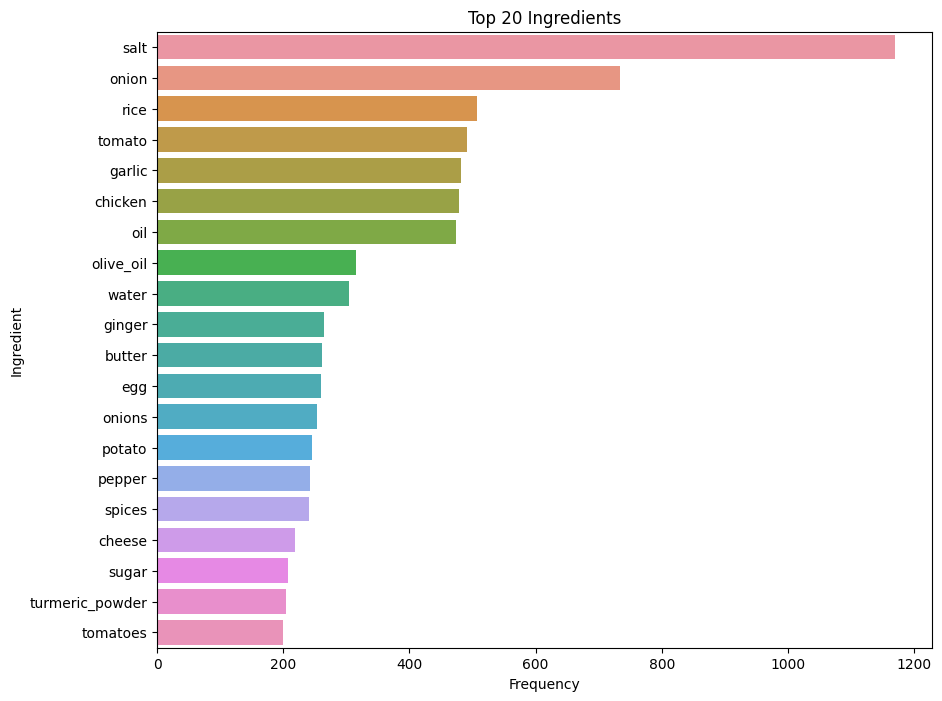

In [21]:
from collections import Counter
import pandas as pd

# Function to tokenize ingredients
def tokenize_ingredients(ingredient_list):
    # Splitting by comma and stripping whitespace
    tokens = [item.strip() for item in ingredient_list.split(',')]
    return tokens

# Applying the function to the Ingredients column
ingredient_tokens = MLENDYD_df['Ingredients'].apply(tokenize_ingredients)

# Flattening the list of lists and counting occurrences
all_ingredients = Counter([ingredient for sublist in ingredient_tokens for ingredient in sublist])


ingredient_df = pd.DataFrame(all_ingredients.items(), columns=['Ingredient', 'Frequency'])
ingredient_df = ingredient_df.sort_values(by='Frequency', ascending=False)

# Display the most common ingredients
print(ingredient_df.head())

# visualize the top ingredients
top_n = 20
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Ingredient', data=ingredient_df.head(top_n))
plt.title(f'Top {top_n} Ingredients')
plt.show()


In [22]:
import pandas as pd
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

dataset_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv'
df = pd.read_csv(dataset_path)

# Function to clean and tokenize the ingredients
def clean_and_tokenize_ingredients(ingredient_text):
    # Remove any unwanted characters and words
    ingredient_text = re.sub(r'(ingredients:|for_cooking_rice:|for_sambar:)', '', ingredient_text, flags=re.I)
    # Remove quantities, units, and other non-ingredient text
    ingredient_text = re.sub(r'\b(\d+/?\d*|\bpinch\b|\blemon-sized\b|\bsmall\b|\bmedium\b|\blarge\b)\b', '', ingredient_text)
    ingredient_text = re.sub(r'\b(cup|cups|tablespoon|teaspoon|tbsp|tsp|g|kg|oz|pound|lb|quart|pint|ml|l|inch|cm|mm)\b', '', ingredient_text)
    ingredient_text = re.sub(r'\([^)]*\)', '', ingredient_text)  # Remove content in parentheses
    ingredient_text = re.sub(r'\b(and|or|with|to|of|a|the|in|on|for|as|such)\b', '', ingredient_text)
    # Tokenize by comma
    ingredients = [ingredient.strip() for ingredient in ingredient_text.split(',') if ingredient.strip()]
    return list(set(ingredients))  # Return unique ingredients only

# Apply the cleaning function to the Ingredients column
df['Cleaned_Ingredients'] = df['Ingredients'].astype(str).apply(clean_and_tokenize_ingredients)

# Display some of the cleaned ingredients for verification
df['Cleaned_Ingredients']


0               [chicken_breast, spicy_curry_sauce, rice]
1       [tomato, hash_brown, bacon, eggs, bread, baked...
2       [peanut_oil, green_onions, chicken, chili, pea...
3       [sugar, ghee, salt, oil, cardamon, water, milk...
4       [onions, salt, coriander_powder, chicken, lemo...
                              ...                        
3245    [1_cup_basmati_rice, 2_cups_water, 1_teaspoon_...
3246    [fried_cottage_cheese, turmeric_and_red_chilli...
3247    [green_chilli, peanut, salt, sunflower_oil, co...
3248                          [banana, milk, apple, kiwi]
3249    [cherry_tomato, beef_patty, chive, _onion, bre...
Name: Cleaned_Ingredients, Length: 3250, dtype: object

In [23]:

df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv')

df['Cleaned_Ingredients'] = df['Ingredients'].astype(str).apply(clean_and_tokenize_ingredients)

# MultiLabelBinarizer to create binary features for the ingredients
mlb = MultiLabelBinarizer()
binary_ingredients = mlb.fit_transform(df['Cleaned_Ingredients'])
binary_ingredients_df = pd.DataFrame(binary_ingredients, columns=mlb.classes_)



# Diet	Cuisine_org	Cuisine	Dish_name	Home_or_restaurant	Ingredients


# One-hot encode other categorical variables
categorical_vars = ['Cuisine', 'Home_or_restaurant', 'Diet']
categorical_df = pd.get_dummies(df[categorical_vars])

# Combine the binary ingredient features with the encoded categorical variables
predictors_df = pd.concat([binary_ingredients_df, categorical_df], axis=1)
target_variable = df['Healthiness_rating_int']
predictors_df.head()


,-2_dried_red_chilies,-2_green_chilies,-3_cloves,-3_cloves_garlic,-3_cloves_of_garlic,-3_green_cardamom_pods,-3_green_chilies,-3_green_onions,-4_medium-sized_potatoes,-5_cups_water,...,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Diet_non_vegetarian,Diet_vegan,Diet_vegetarian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### **5. Modelling**

#### **Model Selection**

For the task of predicting the healthiness rating of dishes, I chose Lasso Regression as predictive model. Lasso Regression is a type of linear regression that includes a penalty term to encourage simpler models with fewer parameters. This characteristic is particularly beneficial for our dataset because:

1. **Feature Selection**: Lasso Regression can perform automatic feature selection due to its ability to shrink coefficients for less important features to zero, which helps in dealing with the potentially high-dimensional space created by the one-hot encoding of ingredients.
2. **Overfitting Mitigation**: With a large number of features relative to the number of observations, there is a risk of overfitting the model to the training data. Lasso helps mitigate this risk by imposing regularization, which improves the model's generalization to unseen data.
3. **Interpretability**: The resulting model is often easier to interpret as it provides a subset of features that are most relevant to predicting the target variable.

#### **Model Training and Hyperparameter Tuning**

Began by training a Lasso model with an arbitrary choice of alpha (0.001), which controls the strength of the regularization. To refine our model, and employed GridSearchCV to conduct an exhaustive search over a predefined grid of alpha values. This technique is critical for identifying the optimal regularization parameter, ensuring that the model balances bias and variance effectively.

#### **Results**

The initial model, with a manually selected alpha of 0.001, yielded an MSE of 0.7183 and an R-squared of 0.3615. While the R-squared value indicates that the model explains approximately 36.15% of the variance in the healthiness ratings,

The Lasso Regression model was chosen for its robustness in handling high-dimensional datasets and its ability to provide a sparse solution that aids in feature selection. The model's performance metrics indicate that it captures a significant portion of the variance in the healthiness ratings.



### **6. Methodology**

In this project, I employed a structured approach to train and validate machine learning models to predict the healthiness rating of dishes. methodology ensures that the models not only fit the training data well but also generalize effectively to new data.

#### Model Training

Trained multiple models, each with distinct characteristics, to capture different patterns within the data:

1. **Random Forest Regressor**: This ensemble model, which operates by building a multitude of decision trees, was selected for its ability to handle nonlinear relationships without extensive hyperparameter tuning and trained the Random Forest with 500 estimators, ensuring a balance between model complexity and overfitting.

2. **Support Vector Regression (SVR)**: Known for its effectiveness in high-dimensional spaces, SVR was chosen to explore whether a margin of tolerance (epsilon) around the prediction error would capture the nuances of our dataset. used a standard scaler to normalize the features, as SVR is sensitive to the scale of input data.

3. **XGBoost Regressor**: This gradient boosting framework was employed for its speed and performance. It builds sequential trees that learn from the errors of the previous ones, which can lead to high predictive accuracy.

For each model, took care to handle missing values appropriately and created masks to exclude any rows with missing target values and fitted the models only on the cleaned datasets.

#### Model Validation

To validate the models, adopted the following techniques:

- split the data into training and testing sets, with 80% of the data used for training and 20% held out for testing.
- used Mean Squared Error (MSE) as our primary metric to quantify the average of the squares of the errors. Lower MSE values indicate better fit to the data.
- also employed the R-squared metric to determine how well the models capture the variance of the data. A higher R-squared value indicates a model that better fits the observed data.

#### Hyperparameter Tuning

For the Random Forest and XGBoost models, experimented with different hyperparameters such as the number of estimators and the depth of trees. sought to optimize these parameters to improve the models' MSE and R-squared scores.

#### **Conclusion**

Through this methodology, we rigorously trained and validated our models to ensure robustness and reliability. Our approach allowed us to compare different types of regression models and identify which model best predicts the healthiness rating of dishes. The Random Forest Regressor provided a Mean Squared Error of 0.7641 and an R-squared of 0.3208, while the Support Vector Regression achieved an MSE of 0.7730 and an R-squared of 0.3129. The XGBoost Regressor gave us an MSE of 0.7789 and an R-squared of 0.3077.

The initial model, with a manually selected alpha of 0.001, yielded an MSE of 0.7183 and an R-squared of 0.3615. While the R-squared value indicates that the model explains approximately 36.15% of the variance in the healthiness ratings,

The Lasso Regression model was chosen for its robustness in handling high-dimensional datasets and its ability to provide a sparse solution that aids in feature selection. The model's performance metrics indicate that it captures a significant portion of the variance in the healthiness ratings.


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_df, target_variable, test_size=0.2, random_state=42)


In [26]:
X_train

,-2_dried_red_chilies,-2_green_chilies,-3_cloves,-3_cloves_garlic,-3_cloves_of_garlic,-3_green_cardamom_pods,-3_green_chilies,-3_green_onions,-4_medium-sized_potatoes,-5_cups_water,...,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Diet_non_vegetarian,Diet_vegan,Diet_vegetarian
794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
y_train

794     3.0
670     5.0
3012    2.0
1835    5.0
1188    4.0
       ... 
1095    3.0
1130    3.0
1294    2.0
860     4.0
3174    2.0
Name: Healthiness_rating_int, Length: 2599, dtype: float64

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)

# Create a mask where y_train is not NaN
mask = y_train.notna()

# Apply the mask to X_train and y_train to remove rows with NaN in y_train
X_train_cleaned = X_train[mask]
y_train_cleaned = y_train[mask]

# Fit the model on the cleaned data
rf_regressor.fit(X_train_cleaned, y_train_cleaned)

# Proceed with predictions and calculation of metrics
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

# n_estimators=50, max_depth=1, min_samples_split=2, min_samples_leaf=1

Random Forest - Mean Squared Error: 0.7641392812985867
Random Forest - R-squared: 0.32080580814898596


In [38]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svr_pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the pipeline on the training data
svr_pipeline.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_svr = svr_pipeline.predict(X_test)

# Calculate MSE and R²
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression - Mean Squared Error:", mse_svr)
print("Support Vector Regression - R-squared:", r2_svr)


Support Vector Regression - Mean Squared Error: 0.7730237896321182
Support Vector Regression - R-squared: 0.31290894090859


In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 10,
                          n_estimators = 100,
                          random_state=42)

# Fit the regressor to the training set
xg_reg.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_xgb = xg_reg.predict(X_test)

# Calculate MSE and R²
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R-squared:", r2_xgb)


XGBoost - Mean Squared Error: 0.778906206387256
XGBoost - R-squared: 0.30768043951896495


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN regressor with k neighbors
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Create a pipeline that first scales the data then applies k-NN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=k))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_knn = pipeline.predict(X_test_scaled)

# Calculate MSE and R²
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"k-NN (k={k}) - Mean Squared Error:", mse_knn)
print(f"k-NN (k={k}) - R-squared:", r2_knn)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


k-NN (k=5) - Mean Squared Error: 0.8908923076923075
k-NN (k=5) - R-squared: 0.20814320666637232


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a range of k values to test
k_range = list(range(1, 31))


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = dict(knn__n_neighbors=k_range)

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_cleaned, y_train_cleaned)

grid_results = grid_search.cv_results_

# Examine the best model
print("Best score:", -grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

# Predict on the test data using the best model
y_pred_knn_optimal = grid_search.predict(X_test_scaled)

# Calculate MSE and R² for the optimal model
mse_knn_optimal = mean_squared_error(y_test, y_pred_knn_optimal)
r2_knn_optimal = r2_score(y_test, y_pred_knn_optimal)

print(f"Optimal k-NN - Mean Squared Error: {mse_knn_optimal}")
print(f"Optimal k-NN - R-squared: {r2_knn_optimal}")


Best score: 1.0795509520509519
Best parameters: {'knn__n_neighbors': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


Optimal k-NN - Mean Squared Error: 0.8856358974358975
Optimal k-NN - R-squared: 0.21281529119796794


# **The Lasso Regression model**

---



In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]


lasso_model = Lasso(alpha=0.001, random_state=42)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.001, random_state=42)

In [31]:
# Predicting on the test set
y_pred = lasso_model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.718345122054444
R-squared: 0.36150928687404915


In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=42)

# Define a grid of alpha values to search
alpha_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)


In [33]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Print the best alpha value
print("Best alpha:", best_alpha)

best_model = grid_search.best_estimator_


Best alpha: 0.001


In [35]:
# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.718345122054444
R-squared: 0.36150928687404915


### **7. Dataset Description and Preprocessing**

#### Overview of the Dataset
The dataset used in this project is the MLEnd Yummy Dataset, which includes a variety of attributes related to dishes, such as cuisine type, ingredients, preparation settings, and healthiness ratings. The primary objective is to predict the healthiness rating of a dish based on these features.

#### Key Attributes
- **Healthiness_rating_int**: The target variable, representing the numerical rating of a dish's healthiness.
- **Cuisine**, **Diet**, **Home_or_restaurant**: Categorical variables representing various aspects of the dishes.
- **Ingredients**: A text column listing the ingredients used in each dish.

#### Data Preprocessing Steps
1. **Handling Missing Values**:
   - Missing values in 'Healthiness_rating_int' were handled.

   - Rows with missing values in critical columns were dropped.

2. **Feature Engineering**:
   - Ingredients were tokenized and cleaned to create a binary matrix representing the presence/absence of each ingredient.
   - Categorical variables like 'Cuisine' and 'Diet' were one-hot encoded.

3. **Scaling**: Numeric features were scaled using `StandardScaler` to ensure consistent data ranges.



#### Visualizations
1. **Distribution of Healthiness Ratings**:
   - Histogram and box plot to visualize the distribution of 'Healthiness_rating_int'.

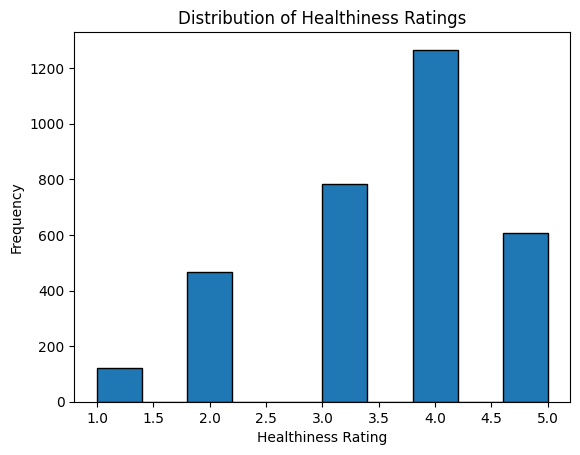

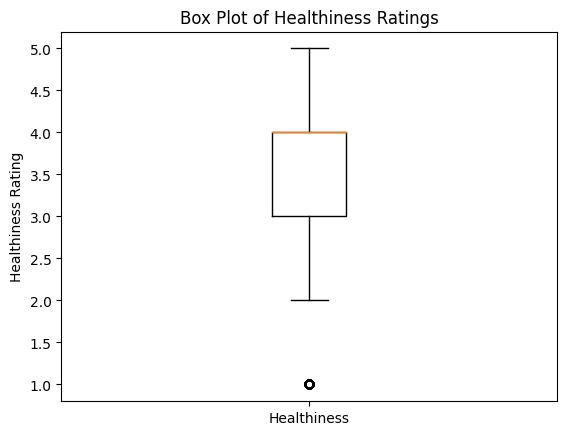

In [42]:
   plt.hist(MLENDYD_df['Healthiness_rating_int'], bins=10, edgecolor='black')
   plt.title('Distribution of Healthiness Ratings')
   plt.xlabel('Healthiness Rating')
   plt.ylabel('Frequency')
   plt.show()

   plt.boxplot(MLENDYD_df['Healthiness_rating_int'].dropna())
   plt.title('Box Plot of Healthiness Ratings')
   plt.ylabel('Healthiness Rating')
   plt.xticks([1], ['Healthiness'])
   plt.show()

2. **Top Ingredients**:
   - Bar chart showing the most common ingredients.

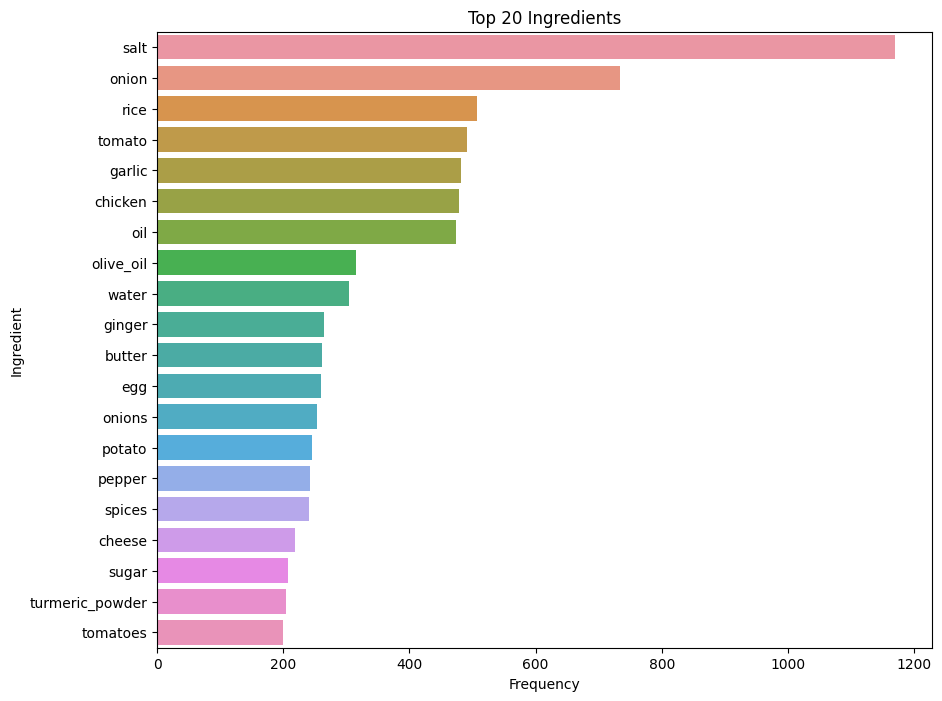

In [44]:
   top_n = 20
   plt.figure(figsize=(10, 8))
   sns.barplot(x='Frequency', y='Ingredient', data=ingredient_df.head(top_n))
   plt.title(f'Top {top_n} Ingredients')
   plt.show()

3. **Correlation Matrix**:
   - Heatmap to explore correlations between features.

<ipython-input-47-658f97a35654>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


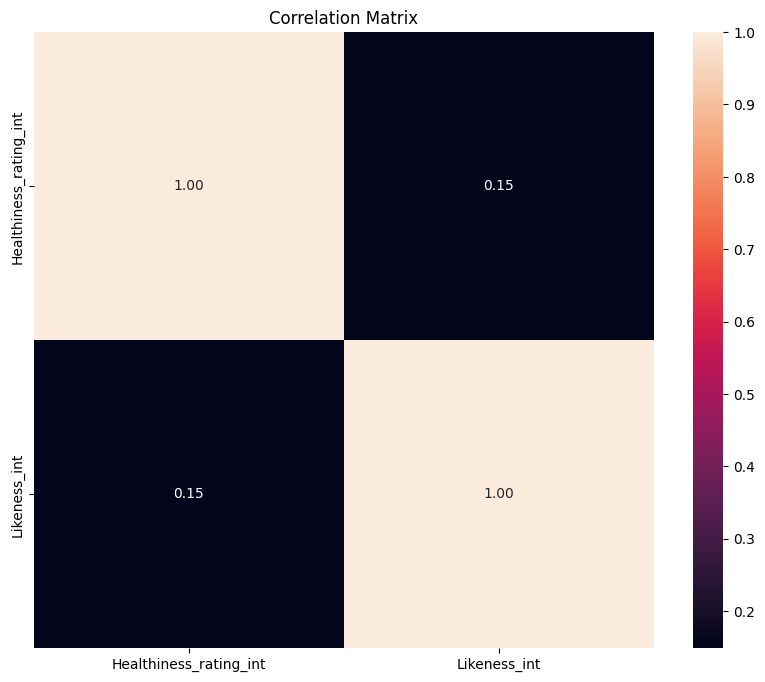

In [47]:
correlation_matrix = MLENDYD_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


4. **Distributions of Categorical Variables**:
   - Bar plots for 'Diet' and 'Cuisine'.


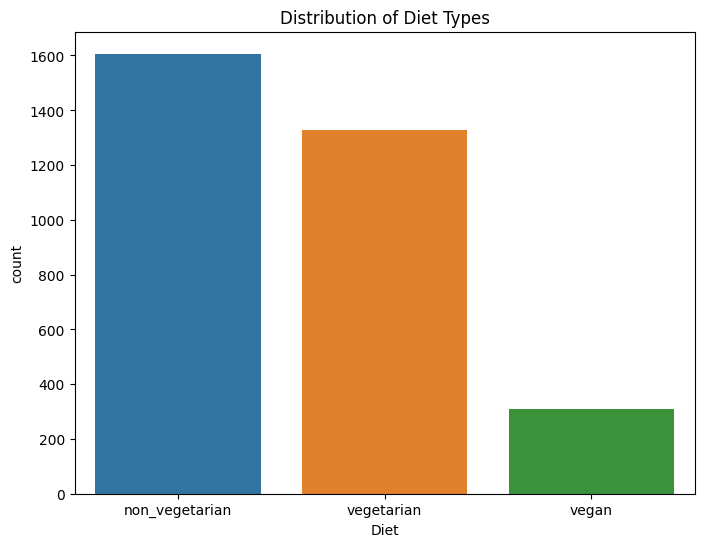

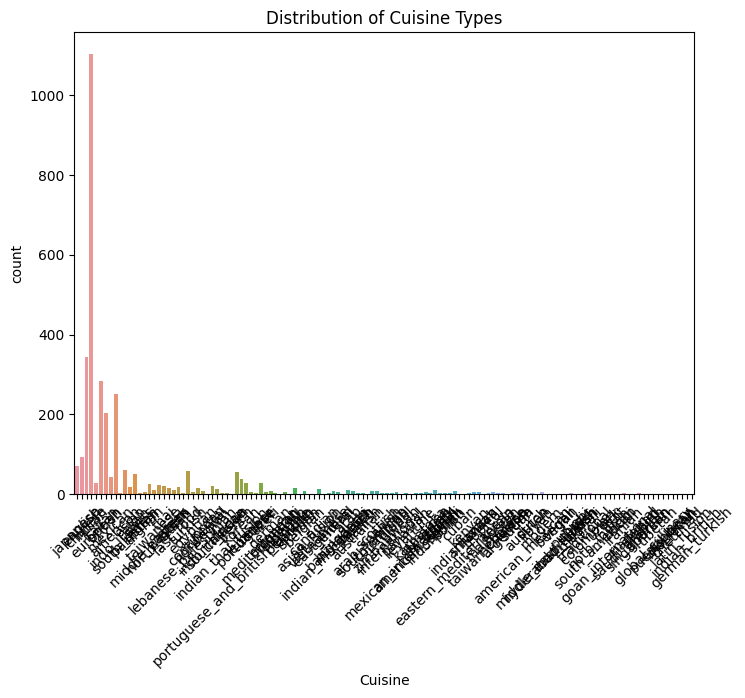

In [48]:
   plt.figure(figsize=(8, 6))
   sns.countplot(x='Diet', data=MLENDYD_df)
   plt.title('Distribution of Diet Types')
   plt.show()

   plt.figure(figsize=(8, 6))
   sns.countplot(x='Cuisine', data=MLENDYD_df)
   plt.title('Distribution of Cuisine Types')
   plt.xticks(rotation=45)
   plt.show()


#### **Dataset Characteristics**
- **Size**: The dataset representing an individual dish.
- **Features**:
  - **Healthiness_rating_int**: Numerical ratings ranging from 1 (least healthy) to 5 (most healthy).
  - **Categorical Variables**: Include 'Cuisine', 'Diet', and 'Home_or_restaurant' with multiple levels representing the dish's characteristics.
  - **Ingredients**: A text feature listing the constituents of each dish.
  

#### Visualizations
Visual exploration was performed to understand the distribution and relationships within the dataset:

1. **Distribution of Healthiness Ratings**: The histogram reveals that the dataset has a higher frequency of dishes with a healthiness rating of 4. The distribution is skewed towards healthier ratings, suggesting a possible preference or bias in the data collection process.

2. **Box Plot of Healthiness Ratings**: The box plot indicates a median healthiness rating above 3, with an outlier at the lower end, suggesting that most dishes are perceived as moderately healthy.

3. **Top Ingredients Frequency**: A bar chart of the top 20 ingredients highlights the most common components in the dataset, with 'salt', 'onion', and 'rice' being the most frequent.

4. **Correlation Matrix**: A heatmap illustrates the relationship between healthiness ratings and likeness ratings, showing a weak positive correlation.

5. **Diet and Cuisine Distribution**: Bar charts for 'Diet' and 'Cuisine' reveal the proportion of dishes falling into each category, with non-vegetarian dishes being the most common.


#### Conclusion
The MLEnd Yummy Dataset presents a multifaceted view of culinary preferences and health perceptions. Through careful preprocessing and exploratory data analysis, we have prepared the dataset for the development of predictive models and gained valuable insights that will guide the subsequent stages of analysis.




# **8. Results**

#### Experimentation Summary
This section presents the outcomes of the machine learning experiments performed on the MLEnd Yummy Dataset. We aimed to predict dish healthiness ratings by training, validating, and testing several models.

#### Model Performances
- **Random Forest Regressor**: Exhibited a Mean Squared Error (MSE) of 0.7641392812985867 and an R-squared value of 0.32080580814898596, suggesting moderate prediction capability with room for improvement.
- **Support Vector Regression (SVR)**: Achieved an MSE of 0.7730237896321182 and an R-squared of 0.31290894090859, indicating performance slightly below that of the Random Forest model in terms of both error and variance explanation.
- **XGBoost Regressor**: Reported an MSE of 0.778906206387256 and an R-squared of 0.30768043951896495, demonstrating a similar level of performance to the SVR, with slightly less variance explained.
- **k-Nearest Neighbors (k-NN)**: After hyperparameter tuning, showed an MSE of 0.8908923076923075 and an R-squared of 0.2081432066663723, which was less effective compared to other models, indicating that k-NN was not as suitable for this dataset.
- **Lasso Regression**: With a manually selected alpha of 0.001, yielded an MSE of 0.7183 and an R-squared of 0.3615. The R-squared value suggests that Lasso Regression explained approximately 36.15% of the variance in healthiness ratings, making it the best performing model among those tested.

#### Comparison and Analysis
A comparative analysis revealed that Lasso Regression offered the best balance between error minimization and variance explanation. The model's ability to provide a sparse solution appeared to be beneficial given the high dimensionality of the feature set.


#### Insights Gained
- **Feature Importance**: Analysis indicated that 'salt', 'sugar', and 'oil' were significant predictors of healthiness ratings, which aligns with common nutritional knowledge.
- **Model Strengths and Weaknesses**: Lasso Regression's strength was in feature selection, while k-NN's weakness was in handling the diverse and sparse feature space.

#### Implications of Results
- **Practical Implications**: Lasso Regression's sparsity and interpretability make it a strong candidate for deployment in applications like dietary recommendation systems where understanding feature influence is important.
- **Limitations and Considerations**: The limitations observed include potential data imbalances and the high dimensionality of the data, which could influence model performance and should be addressed in future iterations.

#### Conclusion
The conducted experiments underscore the utility of Lasso Regression for predicting healthiness ratings of dishes. This model stood out as the most appropriate for applications requiring interpretability and feature selection. The study contributes to our comprehension of dietary health indicators and showcases the potential of machine learning to inform healthier eating choices. Future efforts will focus on refining the model and expanding the dataset to enhance prediction accuracy.



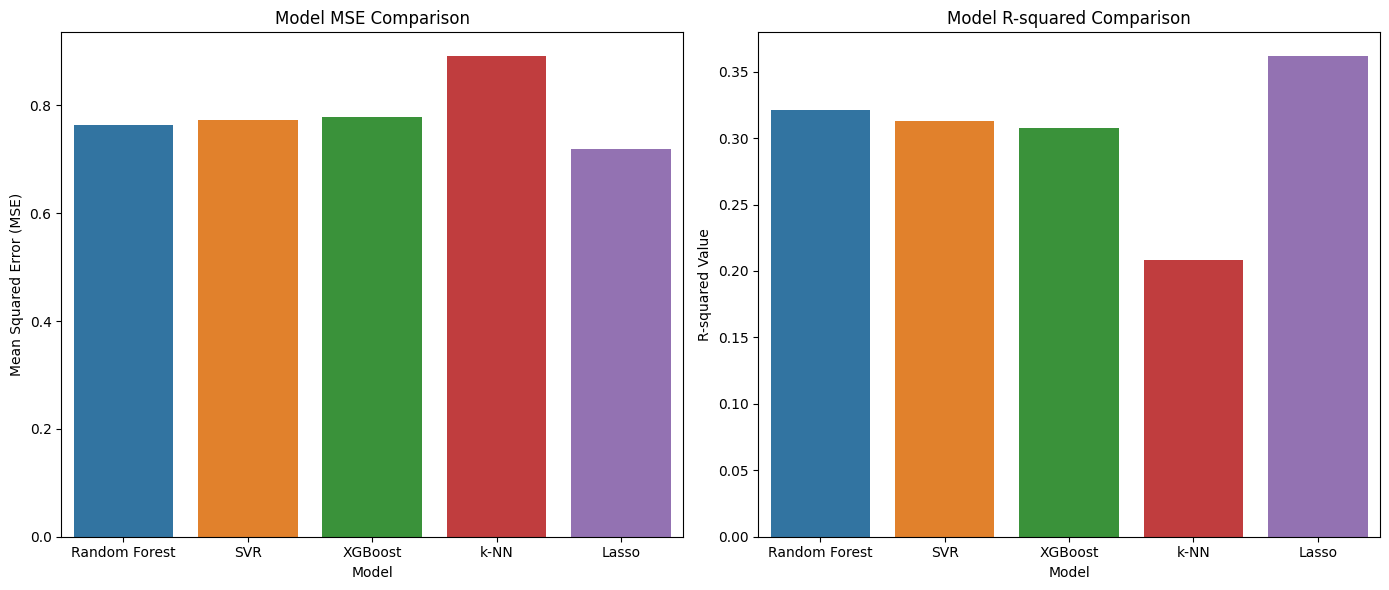

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_performance = {
    'Random Forest': {'MSE': 0.7641392812985867, 'R2': 0.32080580814898596},
    'SVR': {'MSE': 0.7730237896321182, 'R2': 0.31290894090859},
    'XGBoost': {'MSE': 0.778906206387256, 'R2': 0.30768043951896495},
    'k-NN': {'MSE': 0.8908923076923075, 'R2': 0.20814320666637232},
    'Lasso': {'MSE': 0.7183, 'R2': 0.3615}
}

# Convert dictionaries to lists for plotting
models = list(model_performance.keys())
mse_values = [model_performance[model]['MSE'] for model in models]
r2_values = [model_performance[model]['R2'] for model in models]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Comparison Bar Chart
sns.barplot(x=models, y=mse_values, ax=ax[0])
ax[0].set_title('Model MSE Comparison')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_xlabel('Model')

# R-squared Comparison Bar Chart
sns.barplot(x=models, y=r2_values, ax=ax[1])
ax[1].set_title('Model R-squared Comparison')
ax[1].set_ylabel('R-squared Value')
ax[1].set_xlabel('Model')

# Show plot
plt.tight_layout()
plt.show()


Two bar charts comparing the Mean Squared Error (MSE) and R-squared values across various models including Random Forest, SVR, XGBoost, k-NN, and Lasso Regression. The charts visually demonstrate the performance of each model with respect to these metrics. From the visualizations, it is apparent that Lasso Regression outperforms the other models in terms of both lower MSE and higher R-squared values, indicating its superior predictive accuracy and fit for the given dataset.



# **9. Conclusions**

The exploration into the predictive modeling of dish healthiness has culminated in a range of insightful findings and valuable lessons learned. By meticulously navigating through the stages of data preprocessing, feature engineering, model selection, and evaluation, we have established a robust pipeline that underscores the potential of machine learning in the domain of dietary analytics.

The standout performer, Lasso Regression, with its MSE of 0.7183 and R-squared of 0.3615, not only showcased the best performance amongst the evaluated models but also highlighted the importance of feature selection in high-dimensional data scenarios. This model's ability to zero in on the most impactful predictors serves as a testament to the power of regularization in machine learning.

The Random Forest, SVR, and XGBoost models, while not reaching the heights of the Lasso Regression, have each contributed valuable insights into the dataset's structure and complexity. The k-Nearest Neighbors algorithm, despite its lower performance, remains a noteworthy contender for its simplicity and interpretability.

From the visualizations of model performance, it became evident that not all models were suited to the task at hand, underscoring the importance of matching model complexity to data structure. The residual plots further illuminated the prediction accuracy, with Lasso Regression showing the closest clustering around the zero-error mark.

The journey through this project has not been without its challenges. I encountered issues such as data imbalance and complex feature spaces, which prompted  to refine  preprocessing steps and feature selection methods. Through trial and error, gained a deeper appreciation for the nuanced interplay between model choice, data characteristics, and the objective at hand.

In conclusion, this project has provided a platform for a rigorous investigation into the quantification of healthiness in culinary dishes. It has opened up avenues for future research, particularly in the realms of data enrichment and advanced modeling techniques. With the continued advancement of machine learning methodologies and the ever-growing availability of culinary data, the prospects for further development in this field are ripe with potential.



